In [1]:
#Se importan las librerias necesaras

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from statsmodels.api import add_constant
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import pystan

pd.set_option('display.max_columns', None) # para ver todas las columnas

In [2]:
stars = pd.read_csv("stellar.csv")

In [3]:
col = 'clase'
print(stars[col].unique())

['MS' 'PMS']


In [4]:
stars = stars[stars.clase != 'PMS']

In [5]:
cols = ['M','eM1','eM2','R','eR1','eR2','Teff','eTeff1', 'eTeff2','L','eL1','eL2','Meta','eMeta1', 'eMeta2', 'logg', 'elogg1', 'elogg2', 'rho', 'erho1', 'erho2','clase']

In [6]:
stars = stars[cols]

In [7]:
stars.head(10)

,M,eM1,eM2,R,eR1,eR2,Teff,eTeff1,eTeff2,L,eL1,eL2,Meta,eMeta1,eMeta2,logg,elogg1,elogg2,rho,erho1,erho2,clase
0,0.876,0.005,0.005,1.316,0.005,0.005,5945,150,150,1.941,0.217,0.217,-0.71,0.10,0.10,4.143,0.003,0.003,NaN,NaN,NaN,MS
1,0.859,0.006,0.006,1.163,0.006,0.006,5959,150,150,1.531,0.171,0.171,-0.71,0.10,0.10,4.242,0.003,0.003,NaN,NaN,NaN,MS
2,1.414,0.009,0.009,1.614,0.014,0.014,6575,120,120,4.375,0.356,0.356,0.10,0.15,0.15,4.173,0.008,0.008,NaN,NaN,NaN,MS
3,1.209,0.006,0.006,1.218,0.010,0.010,6145,120,120,1.901,0.164,0.164,0.10,0.15,0.15,4.351,0.007,0.007,NaN,NaN,NaN,MS
4,2.164,0.070,0.070,2.232,0.023,0.023,10300,250,250,50.350,5.497,5.497,NaN,NaN,NaN,4.075,0.023,0.023,NaN,NaN,NaN,MS
5,2.148,0.070,0.070,2.074,0.022,0.022,9800,230,230,35.645,3.801,3.801,NaN,NaN,NaN,4.137,0.023,0.023,NaN,NaN,NaN,MS
6,1.974,0.040,0.040,2.764,0.020,0.020,7100,60,60,17.418,0.654,0.654,NaN,NaN,NaN,3.850,0.004,0.004,NaN,NaN,NaN,MS
7,2.140,0.040,0.040,3.912,0.030,0.030,6700,60,60,27.669,1.105,1.105,NaN,NaN,NaN,3.580,0.004,0.004,NaN,NaN,NaN,MS
9,1.190,0.006,0.006,1.762,0.007,0.007,6310,147,147,4.365,0.421,0.421,-0.14,0.10,0.10,NaN,NaN,NaN,NaN,NaN,NaN,MS
10,1.105,0.007,0.007,1.224,0.003,0.003,5824,26,26,1.549,0.029,0.029,0.24,0.04,0.04,4.306,0.004,0.004,NaN,NaN,NaN,MS


In [8]:
nulls = stars.isnull().sum(axis = 0)

In [9]:
nulls

M           0
eM1         0
eM2         0
R           0
eR1         0
eR2         0
Teff        0
eTeff1      0
eTeff2      0
L           7
eL1         7
eL2         7
Meta      197
eMeta1    197
eMeta2    197
logg       68
elogg1     68
elogg2     68
rho       274
erho1     274
erho2     274
clase       0
dtype: int64

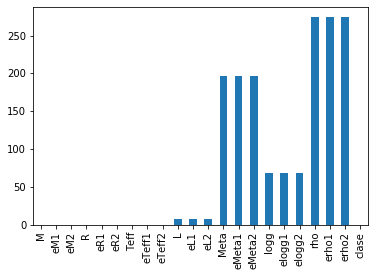

In [10]:
nulls.plot(kind='bar')

In [11]:
print('El porcentaje de NaNs en L es:', round(17*100/726,2), '%')
print('El porcentaje de NaNs en Meta es:', round(216*100/726,2), '%')
print('El porcentaje de NaNs en logg es:', round(94*100/726,2), '%')
print('El porcentaje de NaNs en rho es:', round(304*100/726,2), '%')

El porcentaje de NaNs en L es: 2.34 %
El porcentaje de NaNs en Meta es: 29.75 %
El porcentaje de NaNs en logg es: 12.95 %
El porcentaje de NaNs en rho es: 41.87 %


In [12]:
stars_drop_DS1 = stars.dropna()

In [13]:
stars_drop_DS1.head(10)

,M,eM1,eM2,R,eR1,eR2,Teff,eTeff1,eTeff2,L,eL1,eL2,Meta,eMeta1,eMeta2,logg,elogg1,elogg2,rho,erho1,erho2,clase
290,1.15,0.04,0.04,1.73,0.04,0.04,5718,71,71,2.700,0.342212,0.342212,0.21,0.08,0.08,4.018,0.013,0.013,0.220865,0.010653,0.010653,MS
291,1.30,0.05,0.05,2.08,0.05,0.05,6251,78,78,6.664,0.597819,0.597819,-0.02,0.08,0.08,3.916,0.013,0.013,0.144876,0.007102,0.007102,MS
292,1.29,0.08,0.08,1.74,0.05,0.05,6420,71,71,4.555,0.353974,0.353974,-0.07,0.11,0.11,4.063,0.016,0.016,0.243591,0.012073,0.012073,MS
293,1.14,0.05,0.05,1.88,0.03,0.03,5926,78,78,4.119,0.374560,0.374560,-0.02,0.11,0.11,3.945,0.014,0.014,0.170442,0.008522,0.008522,MS
294,1.18,0.07,0.07,1.50,0.04,0.04,6316,78,78,3.422,0.297267,0.297267,-0.07,0.08,0.08,4.157,0.015,0.015,0.350117,0.017044,0.017044,MS
295,1.08,0.05,0.05,1.41,0.02,0.02,5705,78,78,2.374,0.207374,0.207374,0.38,0.08,0.08,4.172,0.013,0.013,0.385626,0.017044,0.017044,MS
296,1.17,0.04,0.04,1.37,0.03,0.03,6199,65,65,3.635,0.304111,0.304111,-0.13,0.08,0.08,4.228,0.014,0.014,0.450252,0.021305,0.021305,MS
297,1.22,0.05,0.05,1.83,0.04,0.04,6381,71,71,6.112,0.478281,0.478281,-0.13,0.11,0.11,4.000,0.014,0.014,0.199560,0.008522,0.008522,MS
298,1.44,0.05,0.05,2.45,0.05,0.05,6225,71,71,6.714,0.596777,0.596777,0.10,0.08,0.08,3.817,0.012,0.012,0.097294,0.004261,0.004261,MS
300,1.15,0.04,0.04,1.79,0.04,0.04,6082,65,65,4.372,0.372936,0.372936,-0.24,0.08,0.08,3.990,0.012,0.012,0.199560,0.007812,0.007812,MS


# Regresion Lineal

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
#Se genera el modelo de regresion lineal
linear_regression = LinearRegression()

In [16]:
stars_drop_DS1.columns[1:]

Index(['eM1', 'eM2', 'R', 'eR1', 'eR2', 'Teff', 'eTeff1', 'eTeff2', 'L', 'eL1',
       'eL2', 'Meta', 'eMeta1', 'eMeta2', 'logg', 'elogg1', 'elogg2', 'rho',
       'erho1', 'erho2', 'clase'],
      dtype='object')

In [17]:
y = stars_drop_DS1['M']
x = stars_drop_DS1[['Teff','L','Meta','logg','rho']]

In [18]:
model = linear_regression.fit(x,y)

In [19]:
y_pred = model.predict(x)

In [20]:
#Se imprime la intercepcion y los coeficientes del modelo
print('Intercepcion: \n', model.intercept_)
print('Coeficientes: \n', model.coef_)

Intercepcion: 
 0.532910700880126
Coeficientes: 
 [ 3.56115111e-04  1.66837851e-02  3.72575569e-01 -3.88374061e-01
  1.09570974e-01]


### Ecuación de la Masa para el modelo planteado

M = (Intercepcion) + (Coeficiente_Teff) X1 + (Coeficiente_L) X2 + (Coeficiente_Meta) X3 + (Coeficiente_logg) X4 + (Coeficiente_rho) X5

M = (0.53) + (3.56 x 10-4) X1 + (1.66 x 10-2) X2 + (3.73 x 10-1) X3 + (-3.88 x 10-1) X4 + (1.09 x 10-1) X5

# Interpretacion visual del modelo de LR

C:\Users\vernyjmo\Miniconda3\envs\py3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


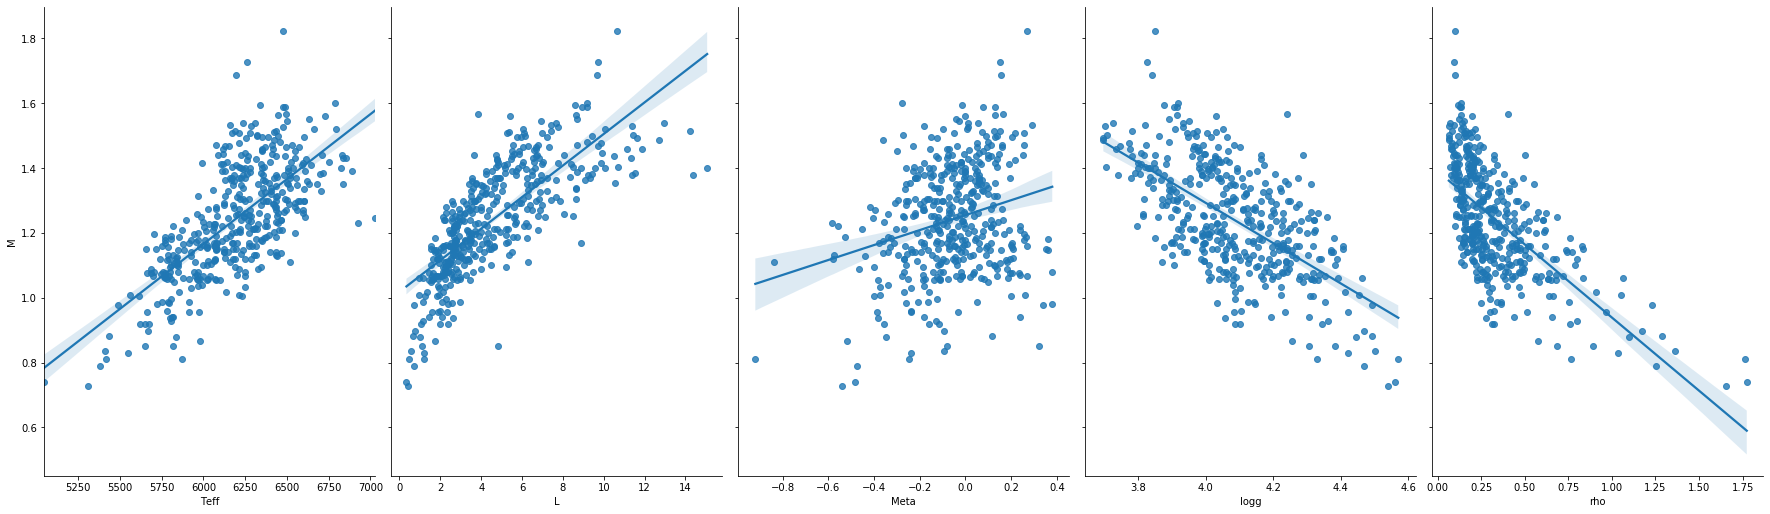

In [22]:
sns.pairplot(stars_drop_DS1, x_vars=['Teff','L','Meta','logg','rho'], y_vars='M', size=7, aspect=0.7, kind='reg')